# Assignment 2

## GOAL
After Assignment 2, you should understand and be able to apply the following functions (in addition to the ones from previous assignment):
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html
- math.sqrt, math.pow (https://docs.python.org/3/library/math.html)
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
- https://pandas.pydata.org/docs/reference/api/pandas.Series.idxmax.html and https://pandas.pydata.org/docs/reference/api/pandas.Series.idxmin.html

## Exercises 
The expected number of lines for each exercises is given between parenthesis

***Ex1.*** Load the CSV file "movie_classification.csv" and store it in a dataframe named movie

In [5]:
import pandas as pd
bool1 = pd.Series([False, True, False, True])
bool1

bool2 = pd.Series([False, False, False, True])
bool2

bool3 = pd.Series([False, True, True, True])
bool3

(bool1) & (bool2)  & (bool3)


0    False
1    False
2    False
3     True
dtype: bool

In [6]:
import pandas as pd
movie = pd.read_csv('movie_classification.csv')
movie

,Title,Genre,budget,kicks,kisses
0,Guardians of the Galaxy,action,1117363,78,0
1,Sing,comedy,1028588,11,16
2,Suicide Squad,action,1357473,79,0
3,The Great Wall,action,1106065,58,38
4,La La Land,comedy,680761,0,31
...,...,...,...,...,...
597,Resident Evil: Afterlife,action,1052447,74,0
598,Project X,comedy,888742,0,0
599,Step Up 2: The Streets,romance,1146999,1,104
600,Search Party,comedy,705447,0,75


In [42]:
movie.sort_values('budget', ascending=False).head(5)

,Title,Genre,budget,kicks,kisses,budget_norm,kicks_norm,kisses_norm
548,Real Steel,action,1640533,79,16,1.000000,0.598485,0.108844
579,The Descendants,comedy,1573377,11,23,0.942865,0.083333,0.156463
280,Big Hero 6,action,1570622,53,11,0.940521,0.401515,0.074830
388,Taken 3,action,1544388,72,0,0.918202,0.545455,0.000000
24,Doctor Strange,action,1512672,31,6,0.891218,0.234848,0.040816


In [43]:
movie.head(5).sort_values('budget', ascending=False)

,Title,Genre,budget,kicks,kisses,budget_norm,kicks_norm,kisses_norm
2,Suicide Squad,action,1357473,79,0,0.759178,0.598485,0.000000
0,Guardians of the Galaxy,action,1117363,78,0,0.554897,0.590909,0.000000
3,The Great Wall,action,1106065,58,38,0.545285,0.439394,0.258503
1,Sing,comedy,1028588,11,16,0.479369,0.083333,0.108844
4,La La Land,comedy,680761,0,31,0.183444,0.000000,0.210884


In [38]:
movie.loc[movie['budget'].nlargest(5).index,:]

,Title,Genre,budget,kicks,kisses,budget_norm,kicks_norm,kisses_norm
548,Real Steel,action,1640533,79,16,1.000000,0.598485,0.108844
579,The Descendants,comedy,1573377,11,23,0.942865,0.083333,0.156463
280,Big Hero 6,action,1570622,53,11,0.940521,0.401515,0.074830
388,Taken 3,action,1544388,72,0,0.918202,0.545455,0.000000
24,Doctor Strange,action,1512672,31,6,0.891218,0.234848,0.040816


In [41]:
movie.sort_values('budget', ascending=False).iloc[[0,1,2,3,4],:]

,Title,Genre,budget,kicks,kisses,budget_norm,kicks_norm,kisses_norm
548,Real Steel,action,1640533,79,16,1.000000,0.598485,0.108844
579,The Descendants,comedy,1573377,11,23,0.942865,0.083333,0.156463
280,Big Hero 6,action,1570622,53,11,0.940521,0.401515,0.074830
388,Taken 3,action,1544388,72,0,0.918202,0.545455,0.000000
24,Doctor Strange,action,1512672,31,6,0.891218,0.234848,0.040816


***Ex2.*** Create 3 news columns 'budget_norm', 'kicks_norm' and 'kisses_norm' to store the normalized value (between 0 and 1) of, respectively, 'budget', 'kicks' and 'kisses'. Expected 3 lines.

In [7]:
movie['budget_norm'] = (movie['budget']-movie['budget'].min())/(movie['budget'].max()-movie['budget'].min())
movie['kicks_norm'] = (movie['kicks']-movie['kicks'].min())/(movie['kicks'].max()-movie['kicks'].min())
movie['kisses_norm'] = (movie['kisses']-movie['kisses'].min())/(movie['kisses'].max()-movie['kisses'].min())
movie

,Title,Genre,budget,kicks,kisses,budget_norm,kicks_norm,kisses_norm
0,Guardians of the Galaxy,action,1117363,78,0,0.554897,0.590909,0.000000
1,Sing,comedy,1028588,11,16,0.479369,0.083333,0.108844
2,Suicide Squad,action,1357473,79,0,0.759178,0.598485,0.000000
3,The Great Wall,action,1106065,58,38,0.545285,0.439394,0.258503
4,La La Land,comedy,680761,0,31,0.183444,0.000000,0.210884
...,...,...,...,...,...,...,...,...
597,Resident Evil: Afterlife,action,1052447,74,0,0.499668,0.560606,0.000000
598,Project X,comedy,888742,0,0,0.360391,0.000000,0.000000
599,Step Up 2: The Streets,romance,1146999,1,104,0.580111,0.007576,0.707483
600,Search Party,comedy,705447,0,75,0.204447,0.000000,0.510204


In [8]:
from sklearn.preprocessing import MinMaxScaler
movie['budget_norm'] = MinMaxScaler().fit(movie[['budget']]).transform(movie[['budget']])
movie['kicks_norm'] = MinMaxScaler().fit(movie[['kicks']]).transform(movie[['kicks']])
movie['kisses_norm'] = MinMaxScaler().fit(movie[['kisses']]).transform(movie[['kisses']])
movie

,Title,Genre,budget,kicks,kisses,budget_norm,kicks_norm,kisses_norm
0,Guardians of the Galaxy,action,1117363,78,0,0.554897,0.590909,0.000000
1,Sing,comedy,1028588,11,16,0.479369,0.083333,0.108844
2,Suicide Squad,action,1357473,79,0,0.759178,0.598485,0.000000
3,The Great Wall,action,1106065,58,38,0.545285,0.439394,0.258503
4,La La Land,comedy,680761,0,31,0.183444,0.000000,0.210884
...,...,...,...,...,...,...,...,...
597,Resident Evil: Afterlife,action,1052447,74,0,0.499668,0.560606,0.000000
598,Project X,comedy,888742,0,0,0.360391,0.000000,0.000000
599,Step Up 2: The Streets,romance,1146999,1,104,0.580111,0.007576,0.707483
600,Search Party,comedy,705447,0,75,0.204447,0.000000,0.510204


In [9]:
for c in ['budget', 'kicks', 'kisses']:
    movie['{}_norm'.format(c)] = (movie[c]-movie[c].min())/(movie[c].max()-movie[c].min())
movie

,Title,Genre,budget,kicks,kisses,budget_norm,kicks_norm,kisses_norm
0,Guardians of the Galaxy,action,1117363,78,0,0.554897,0.590909,0.000000
1,Sing,comedy,1028588,11,16,0.479369,0.083333,0.108844
2,Suicide Squad,action,1357473,79,0,0.759178,0.598485,0.000000
3,The Great Wall,action,1106065,58,38,0.545285,0.439394,0.258503
4,La La Land,comedy,680761,0,31,0.183444,0.000000,0.210884
...,...,...,...,...,...,...,...,...
597,Resident Evil: Afterlife,action,1052447,74,0,0.499668,0.560606,0.000000
598,Project X,comedy,888742,0,0,0.360391,0.000000,0.000000
599,Step Up 2: The Streets,romance,1146999,1,104,0.580111,0.007576,0.707483
600,Search Party,comedy,705447,0,75,0.204447,0.000000,0.510204


***Ex3.*** Create a distance matrix that stores the euclidean distance of the three normalized columns created above. Create the distance matrix using scikit-learn (sklearn.metrics.pairwise.euclidean_distances) and convert it to a dataframe. Expected 2 lines.

In [10]:
from sklearn.metrics.pairwise import euclidean_distances
distanceMatrix = euclidean_distances(movie.loc[:,['budget_norm', 'kicks_norm', 'kisses_norm']])
distanceMatrix = pd.DataFrame(distanceMatrix, index=movie.index, columns=movie.index)

***Ex4.*** In the distance matrix created above, retrieve the distance between movie 0 and movie 1. This distance is stored twice in the distance matrix. Do you understand why, and can you retrieve both of them?. Expected 2 lines.

In [11]:
print(distanceMatrix.loc[1,0]==distanceMatrix.loc[0,1])
distanceMatrix.loc[0,1]

True


0.52458035886755

***Ex5.*** Calculate the Euclidean distance manually between movie 0 and movie 1. You should get the same distance retrieved in the previous exercise. Hint: use math.sqrt and math.pow (don't forget to import math). Expected 3-4 lines to make the code readable.

In [12]:
import math
math.sqrt(
    math.pow(movie.loc[1,['budget_norm']]-movie.loc[0,['budget_norm']],2) +
    math.pow(movie.loc[1,['kicks_norm']]-movie.loc[0,['kicks_norm']],2) +
    math.pow(movie.loc[1,['kisses_norm']]-movie.loc[0,['kisses_norm']],2)
)

0.52458035886755

***Ex6.*** Using the distance matrix, apply the KNN procedure (by hand, not using scikit-learn) to predict the genre with k=10 of the movie 0. Be careful not to include movie 0 in the 10 closest movies. Expected: 1 line

In [13]:
movie.loc[distanceMatrix.drop(0)[0].nsmallest(10).index,'Genre'].mode()

0    action
dtype: object

***Ex7.*** Compare the predicted movie in the previous question with the true movie genre. Expected: 1 line

In [14]:
movie.loc[distanceMatrix.drop(0)[0].nsmallest(15).index,'Genre'].mode() == movie.loc[0,'Genre']

0    True
dtype: bool

***Ex8.*** Store the first 80% movies in a dataframe called 'training' and the last 20% in a dataframe called 'testing'. Expected: 2 lines.

In [15]:
training = movie.head(int(movie.shape[0]*0.8))
testing = movie.tail(movie.shape[0]-training.shape[0])

In [16]:
testing

,Title,Genre,budget,kicks,kisses,budget_norm,kicks_norm,kisses_norm
481,Tramps,comedy,942647,0,110,0.406252,0.000000,0.748299
482,Before We Go,comedy,698825,0,78,0.198813,0.000000,0.530612
483,Max Steel,action,958006,69,0,0.419319,0.522727,0.000000
484,Hotel Transylvania 2,comedy,1073519,0,74,0.517595,0.000000,0.503401
485,Hancock,action,680772,77,0,0.183454,0.583333,0.000000
...,...,...,...,...,...,...,...,...
597,Resident Evil: Afterlife,action,1052447,74,0,0.499668,0.560606,0.000000
598,Project X,comedy,888742,0,0,0.360391,0.000000,0.000000
599,Step Up 2: The Streets,romance,1146999,1,104,0.580111,0.007576,0.707483
600,Search Party,comedy,705447,0,75,0.204447,0.000000,0.510204


**Ex9.** Calculate the accuracy of a baseline 'most frequent' approach. Note: use the training set to retrieve the most frequent and the testing set to calculate the accuracy to reflect a real setting. Implement the baseline from scratch (i.e., not using the dummy classifier from scikit-learn). Expected: 1 line.

In [17]:
(testing['Genre']==training['Genre'].mode().tolist()[0]).mean()

# The line below doesn't work because mode can return several values (when we have ties). So transorming to list a retrieve the first value ensure that we get a single value
#testing['Genre']==training['Genre'].mode()


0.3140495867768595

**Ex10.** Store in a variable named 'pred' the predictions made using KNN (from scikit-learn). We want to predict the 'Genre' of the 'testing' dataset, learning from the 3 normalized columns of the 'training' observations. Expected: 3 lines (without imports). Make sure the classifier is using the euclidean distance.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
model.fit(training[['budget_norm','kicks_norm','kisses_norm']],training['Genre'])
pred = model.predict(testing[['budget_norm','kicks_norm','kisses_norm']])

***Ex11.*** What is the accuracy of 'pred' from the previous question?

In [19]:
(pred == testing['Genre']).mean()

0.6694214876033058

***Ex12.*** What is the accuracy with the 3 same columns without normalization? Again, make sure the classifier is using the euclidean distance.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
model.fit(training[['budget','kicks','kisses']],training['Genre'])
pred = model.predict(testing[['budget','kicks','kisses']])
(pred == testing['Genre']).mean()

0.5702479338842975

***Ex13.*** We want to try various values of k on our testing dataset (using the normalized columns). Complete the code below to store the result in a dataframe named 'results'. PS: I mentioned in week 1 that we would not use any loops this semester. I want to clarify that we will not use any loops to preprocess the data in pandas (but we need loops when creating or fine-tuning the ML models). 

In [21]:
from matplotlib import pyplot as plt
results = []
for k in range(1,451,25):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(training[['budget_norm','kicks_norm','kisses_norm']],training['Genre'])
    pred = model.predict(testing[['budget_norm','kicks_norm','kisses_norm']])
    
    accuracy = (pred == testing['Genre']).mean()
    results.append({'k':k, 'accuracy':accuracy})

results = pd.DataFrame(results)
results

,k,accuracy
0,1,0.661157
1,26,0.652893
2,51,0.694215
3,76,0.694215
4,101,0.710744
5,126,0.702479
6,151,0.694215
7,176,0.694215
8,201,0.694215
9,226,0.694215


***Ex14.*** Use the pandas function idxmax to retrieve the value of k that maximizes the accuracy

In [25]:
results.set_index('k')

,accuracy
k,
1,0.661157
26,0.652893
51,0.694215
76,0.694215
101,0.710744
126,0.702479
151,0.694215
176,0.694215
201,0.694215


In [23]:
results.set_index('k')['accuracy'].idxmax()

101

In [27]:
results.loc[results['accuracy']==results['accuracy'].max(),'k']

4    101
Name: k, dtype: int64

***Ex15.*** Plot a line graph showing the accuracy (y-axis) per value of k (x-axis). Add a name for both axis and a title to the graph. It should look like:
![alt text](https://i.ibb.co/qxHwfxp/download.png)

<AxesSubplot:title={'center':'Choosing the best K'}, xlabel='k', ylabel='accuracy'>

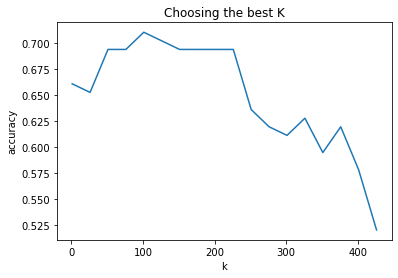

In [24]:
ax = results.set_index('k')['accuracy'].plot.line()
ax.set_xlabel("k")
ax.set_ylabel("accuracy")
ax.set_title("Choosing the best K")
ax